# Neural Networks: Learning

## 1. Notation and number of output units
Neural Networks are widely used to solve classification problems. For binary classification, the number of output units is equal to $1$. For multiclass classification with $K$ classes, there are $K$ output units. We consider the following notation:

* L = total number of layers in the network
* $s_{l}$ number of units (excluding the bias unit) in layer $l$
* K = number of output units/classes.

## 2. Cost function: 
### 2.1 Logistic Regression as starting point
We recall the final regularized form of the cost function for Logistic Regression:
$\begin{align}
    J(\theta) = -\frac{1}{m} \cdot \sum _{i=1}^{m} [y ^ {(i)} \cdot \log(h_{\theta} (x)) + (1 - y) \cdot \log(1 - h_{\theta} (x))] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j ^ 2 
\end{align}$

For neural network, there might be several output units. We denote $h_{\Theta}(x)_j$ as the hypothesis resulting in the $j$-th output unit. The final forms is as follows:

$\begin{align}
    J(\theta) = -\frac{1}{m} \cdot \sum _{i=1}^{m}
    \sum_{k=1}^{K} [y_k ^ {(i)} \cdot \log(h_{\Theta}(x)_k) + (1 - y_k ^ {(i)}) \cdot \log(1 - h_{\Theta}(x)_k)] + \frac{\lambda}{2m} \sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_{l+1}} (\Theta_{j,i}^{(l)})^2
\end{align}$

where $y_k$ is the boolean array $y == k$, for which $y(i) == 1 \iff y(i) == k$

* The first nested summation calculates the logistic regression cost function fo each of the output units.
*  To better understand the second nested summation, we recall that the matrix $\Theta^{(i)}$ is the matrix mapping the values of layer $i$ to the layer $i + 1$. Thus the first summation iterates through all the $L - 1$ mapping matrices.
* Additionally, $\Theta^{(i)}$ is of dimensions $s_{i + 1} * (s_{i} + 1)$ Therefore, two inners sums, calculate the element-wise square $\Theta^{(i)}$ without considering the terms corresponding to the bias unit.
* Let's consider the example of this ***ANN*** and the mapping matrix displayed just below it in the section 2.2: [link](https://github.com/ayhem18/Towards_Data_science/blob/master/Machine_Learning/Neural_Networks/Presentation/summary.ipynb) :

The inner sum corresponding to this matrix will be: 
$\begin{align}
(\Theta_{11}^{(1)})^2 + (\Theta_{12}^{(1)})^2 + (\Theta_{13}^{(1)})^2 +
(\Theta_{21}^{(1)})^2 + (\Theta_{22}^{(1)})^2 + (\Theta_{23}^{(1)})^2 +
(\Theta_{31}^{(1)})^2 + (\Theta_{32}^{(1)})^2 + (\Theta_{31}^{(1)})^2
\end{align}$


### 2.2 Optimizing the cost function
#### 2.2.1 Forward Propagation
It is necessary to distinguish between two notations: $a$ and $z$. We have: 
* $a^{(1)} = x$ where $x$ are the input features.
* $z^{(2)} = \Theta^{(1)} \cdot a^{(1)}$
* $a^{(2)} = g(z^{(2)})$ while adding the bias unit $a^{(2)}_0 = 1$

More generally: 
* $z^{(i)} = \Theta^{(i - 1)} \cdot a^{(i - 1)}$ 

and
* $a^{(i)} = g(z^{(i)})$ with the addition of the bias unit $a^{(i)}_0 = 1$

Considering a single training example $(x, y)$ where $x$ is a features vector and $y$ is the classification's result. We apply the process described above to obtain $a^{(L)} = h_{\Theta}(x)$

### 2.3 Back Propagation
#### 2.3.1 Error Vectors
we introduce the term $\delta_j^{(l)}$ as the *error* of node $j$ in layer $l$. More generally, $\delta^{(l)}$ is the vector:
$\begin{align} \begin{bmatrix}
\delta_1^{(1)}\\
\delta_2^{(l)}\\
.. \\
.. \\
\delta_{s_l}^{(l)}\end{bmatrix}
\end{align}$ 

The mathematical relation between $\delta^{(i)}$ and $\delta^{(i - 1)}$ can be expressed as follows: 

$\begin{align}
\delta^{(L)} &= a^{(L)} - y \\
\delta^{(i - 1)} &= (\Theta^{(i - 1)})^{T} \cdot \delta^{(i)} .* (a^{(i - 1)} * (a^{(i - 1)} - 1))
\end{align}$

where .* represents the element-wise multiplication operator. It is important to note that $\delta_j^{(l)}$ is not considered as no error is associated with the input features.

#### 2.3.2 Back Propagation algorithm
considering a training data set: ${(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}),... ,(x^{(m)}, y^{(m)})}$ 
The algorithm can be modeled through this piece of [pseudo-code](https://github.com/ayhem18/Towards_Data_science/blob/master/Machine_Learning/Neural_Networks/learning/Back_Propagation_algo.pdf)


## 3. Additional Notes
### 3.1 Activation functions

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(x, y):
    # setting the plot parameters 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, y, 'r')
    plt.show()

There are several used activation functions:
1. Sigmoid function: $\begin{align} \frac{1}{1 + e ^{-x}}\end{align}$

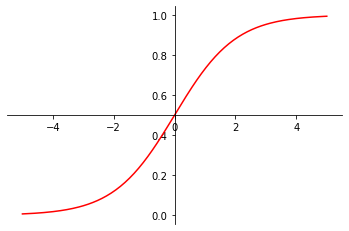

In [12]:
# 200 linearly spaced numbers
x = np.linspace(-5, 5, 200)

# the sigmoid function
y = 1 / (1 + np.exp(-x))

plot_function(x, y)


2. hyperbolic tangeant function: $\begin{align}~tanh(x) = \frac{e^{-x} - e^{x}}{e^{-x} + e^{x}}\end{align}$

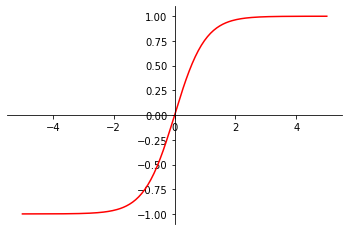

In [13]:
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plot_function(x, y)

3. Rectified Linear Unit: ReLu function: $~\begin{align} max(x, 0)\end{align}$

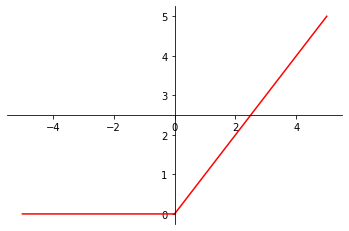

In [14]:
y = (x >= 0) * x
plot_function(x, y)

4. Leaky ReLU function: $\begin{align} max(\alpha x, x)\end{align}$ where $\alpha < 1$

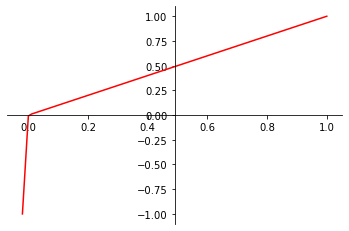

In [19]:
x = np.linspace(-1, 1, 100)
alpha = 0.02
alpha_x = alpha * x
y = (alpha_x <= x) * x + (alpha_x >= x) * alpha_x 
plot_function(y, x) 

Only ***ReLu*** and ***sigmoid*** functions can be used for the output layer to keep the output in the range $[0, ~1]$. Yet, for hidden layers, sigmoid function is no longer widely used as it slows the learning speed significantly. 

The activation should be non-linear. Otherwise the final output (regarldess of the number of hidden units) would be a linear combination of the input vector. 